<a href="https://colab.research.google.com/github/FredMiraglia/projeto_analise_dados/blob/main/Mercado_financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
pd.options.plotting.backend = 'plotly'
import requests as rs
#import pandas_datareader as pdr
#from pandas_datareader import data as pdr
import yfinance
import datetime as dt

In [2]:
ativos =["ITUB3.SA","VALE3.SA","PETRE4.SA","^BVSP"]

In [3]:
inicio =("1960-03-01")
fim =("2024-03-15")

In [4]:
tabela_cotaçoes = yfinance.download(ativos,inicio,fim)

[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PETRE4.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [5]:
display(tabela_cotaçoes)

Price       Adj Close                                          Close  \
Ticker       ITUB3.SA PETRE4.SA   VALE3.SA          ^BVSP   ITUB3.SA   
Date                                                                   
1993-04-27        NaN       NaN        NaN      24.500000        NaN   
1993-04-28        NaN       NaN        NaN      24.299999        NaN   
1993-04-29        NaN       NaN        NaN      23.700001        NaN   
1993-04-30        NaN       NaN        NaN      24.100000        NaN   
1993-05-03        NaN       NaN        NaN      24.100000        NaN   
...               ...       ...        ...            ...        ...   
2024-03-08  28.310257       NaN  60.417625  127071.000000  29.549999   
2024-03-11  28.252771       NaN  58.541302  126124.000000  29.490000   
2024-03-12  28.300674       NaN  58.176548  127668.000000  29.540001   
2024-03-13  28.521027       NaN  58.549477  128006.000000  29.770000   
2024-03-14  28.588085       NaN  57.803623  127690.000000  29.840000   

Price                                                High            ...  \
Ticker     PETRE4.SA   VALE3.SA          ^BVSP   ITUB3.SA PETRE4.SA  ...   
Date                                                                 ...   
1993-04-27       NaN        NaN      24.500000        NaN       NaN  ...   
1993-04-28       NaN        NaN      24.299999        NaN       NaN  ...   
1993-04-29       NaN        NaN      23.700001        NaN       NaN  ...   
1993-04-30       NaN        NaN      24.100000        NaN       NaN  ...   
1993-05-03       NaN        NaN      24.100000        NaN       NaN  ...   
...              ...        ...            ...        ...       ...  ...   
2024-03-08       NaN  66.010002  127071.000000  29.730000       NaN  ...   
2024-03-11       NaN  63.959999  126124.000000  29.660000       NaN  ...   
2024-03-12       NaN  60.840000  127668.000000  29.740000       NaN  ...   
2024-03-13       NaN  61.230000  128006.000000  29.959999       NaN  ...   
2024-03-14       NaN  60.450001  127690.000000  29.990000       NaN  ...   

Price             Low                      Open                       \
Ticker       VALE3.SA          ^BVSP   ITUB3.SA PETRE4.SA   VALE3.SA   
Date                                                                   
1993-04-27        NaN      24.500000        NaN       NaN        NaN   
1993-04-28        NaN      23.700001        NaN       NaN        NaN   
1993-04-29        NaN      23.700001        NaN       NaN        NaN   
1993-04-30        NaN      23.700001        NaN       NaN        NaN   
1993-05-03        NaN      23.799999        NaN       NaN        NaN   
...               ...            ...        ...       ...        ...   
2024-03-08  65.900002  125802.000000  29.230000       NaN  66.199997   
2024-03-11  63.720001  126065.000000  29.400000       NaN  64.779999   
2024-03-12  60.660000  126121.000000  29.660000       NaN  62.360001   
2024-03-13  60.290001  127439.000000  29.629999       NaN  60.599998   
2024-03-14  60.169998  127192.000000  29.750000       NaN  61.099998   

Price                        Volume                                    
Ticker              ^BVSP  ITUB3.SA PETRE4.SA    VALE3.SA       ^BVSP  
Date                                                                   
1993-04-27      24.799999       NaN       NaN         NaN         0.0  
1993-04-28      24.500000       NaN       NaN         NaN         0.0  
1993-04-29      24.299999       NaN       NaN         NaN         0.0  
1993-04-30      23.700001       NaN       NaN         NaN         0.0  
1993-05-03      24.100000       NaN       NaN         NaN         0.0  
...                   ...       ...       ...         ...         ...  
2024-03-08  128335.000000  344100.0       NaN  23188200.0  11937900.0  
2024-03-11  127068.000000  436300.0       NaN  58622400.0   8899100.0  
2024-03-12  126124.000000  637100.0       NaN  44680100.0   9483700.0  
2024-03-13  127668.000000  416800.0       NaN  327692

In [6]:
vale= tabela_cotaçoes['Adj Close'][['VALE3.SA']]

In [7]:
vale.reset_index(inplace=True)

In [8]:
vale.columns = ['ds','y']

In [9]:
vale = vale[['ds','y']]

In [10]:
from prophet import Prophet

In [11]:
m = Prophet()
m.fit(vale)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ngwk_mo/zp1d2fpz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ngwk_mo/gjjpc5jr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54840', 'data', 'file=/tmp/tmp4ngwk_mo/zp1d2fpz.json', 'init=/tmp/tmp4ngwk_mo/gjjpc5jr.json', 'output', 'file=/tmp/tmp4ngwk_mo/prophet_model1uk9xlxj/prophet_model-20250103041212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:12:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:12:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
8090,2025-03-10
8091,2025-03-11
8092,2025-03-12
8093,2025-03-13
8094,2025-03-14


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8090,2025-03-10,85.147705,77.304898,92.219804
8091,2025-03-11,85.151939,77.906478,92.328156
8092,2025-03-12,85.200236,78.059878,92.910106
8093,2025-03-13,85.177652,77.841616,92.652789
8094,2025-03-14,85.175550,77.343314,92.406528


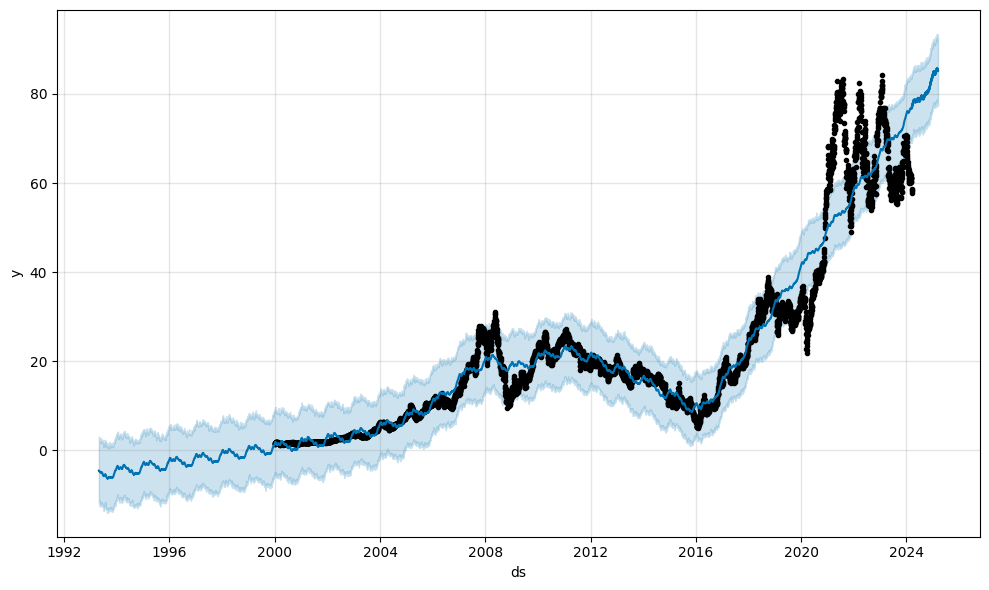

In [14]:
fig1 = m.plot(forecast)

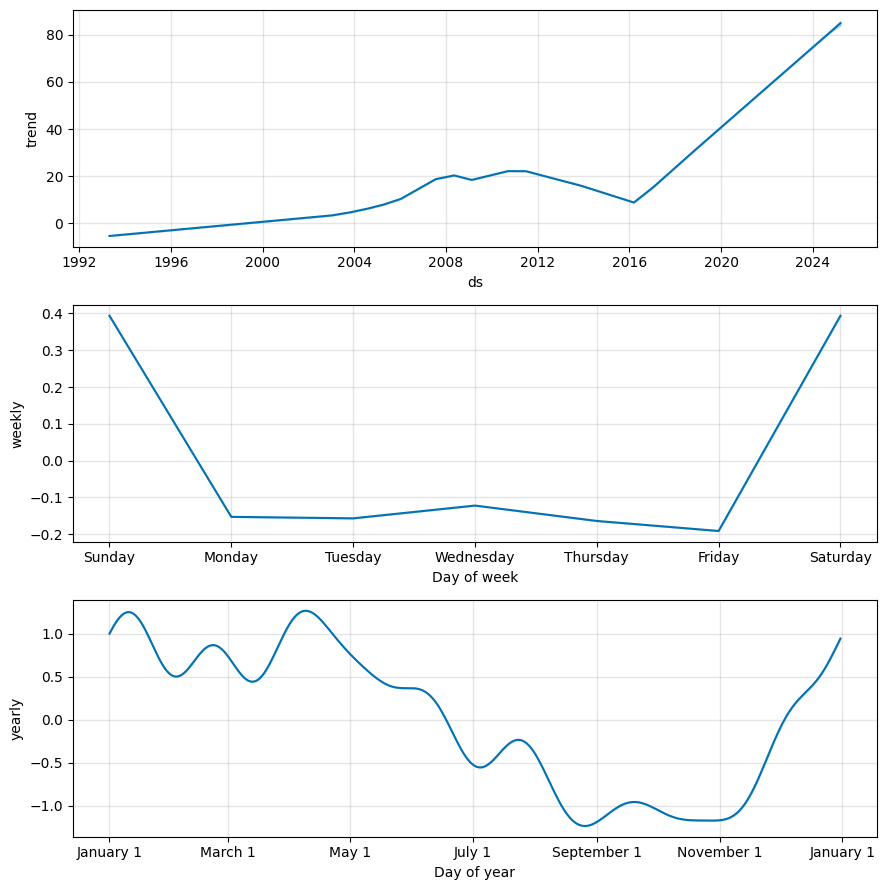

In [15]:
fig2 = m.plot_components(forecast)

In [16]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [17]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

